<H1> The Battle of the Neighbourhoods!

This notebook will be used for creating the Capstone Project for Applied Data Science Course on Coursera

In [1]:
print('Hello Capstone Project Course!')

Hello Capstone Project Course!


<H1> Opening an Italian Restaurant in Amsterdam

<H2> Importing all the required modules

In [2]:
import pandas as pd
import numpy as np
import folium
import requests
import json
import matplotlib.pyplot as plt 
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.metrics import silhouette_score 
from geopy.geocoders import Nominatim
from bs4 import BeautifulSoup 
from sklearn.cluster import KMeans 
from sklearn import metrics 
from scipy.spatial.distance import cdist 

<H2> Dataset containing the details of the Neighbourhoods of Amsterdam

In [3]:
ams_df = pd.read_csv('Amsterdam_neighborhood.csv')

In [4]:
ams_df.head()

,subject,region_name,regio_type,region_code,ninhabitants,nmen,nwomen,nage_0_to_15,nage_15_to_25,nage_25_to_45,...,ave_househ_size,populatio_density,area_total,area_land,area_water,urbanisation_grade,address_density,geojson,lon,lat
0,Amsterdam,Amsterdam,Gemeente,GM0363,833624,411608.0,422016.0,127224.0,108370.0,293154.0,...,1.8,5042.0,21949.0,16533.0,5416.0,1.0,6011.0,"{""type"": ""FeatureCollection"",""crs"": { ""type"": ...",4.879568,52.381000
1,Burgwallen-Oude Zijde,Amsterdam,Wijk,WK036300,4280,2340.0,1935.0,255.0,675.0,2030.0,...,1.4,12255.0,40.0,35.0,6.0,1.0,7619.0,"{""type"": ""FeatureCollection"",""crs"": { ""type"": ...",4.896943,52.372566
2,Kop Zeedijk,Amsterdam,Buurt,BU03630000,1020,570.0,445.0,50.0,140.0,520.0,...,1.4,16818.0,8.0,6.0,2.0,1.0,6649.0,"{""type"": ""FeatureCollection"",""crs"": { ""type"": ...",4.900280,52.375937
3,Oude Kerk e.o.,Amsterdam,Buurt,BU03630001,670,365.0,300.0,30.0,130.0,320.0,...,1.3,7615.0,9.0,9.0,0.0,1.0,7361.0,"{""type"": ""FeatureCollection"",""crs"": { ""type"": ...",4.896156,52.373793
4,Burgwallen Oost,Amsterdam,Buurt,BU03630002,1610,880.0,730.0,120.0,250.0,755.0,...,1.4,25867.0,7.0,6.0,1.0,1.0,7544.0,"{""type"": ""FeatureCollection"",""crs"": { ""type"": ...",4.898757,52.372815


<H2> Filtering region type only on quarters (Quarters is nothing but a collection of 2 or more Neighbourhoods)

In [5]:
ams_df = ams_df[ams_df['regio_type'] == 'Wijk']

In [6]:
ams_df.head()

,subject,region_name,regio_type,region_code,ninhabitants,nmen,nwomen,nage_0_to_15,nage_15_to_25,nage_25_to_45,...,ave_househ_size,populatio_density,area_total,area_land,area_water,urbanisation_grade,address_density,geojson,lon,lat
1,Burgwallen-Oude Zijde,Amsterdam,Wijk,WK036300,4280,2340.0,1935.0,255.0,675.0,2030.0,...,1.4,12255.0,40.0,35.0,6.0,1.0,7619.0,"{""type"": ""FeatureCollection"",""crs"": { ""type"": ...",4.896943,52.372566
7,Burgwallen-Nieuwe Zijde,Amsterdam,Wijk,WK036301,3960,2150.0,1805.0,220.0,595.0,2100.0,...,1.4,6935.0,73.0,57.0,16.0,1.0,9206.0,"{""type"": ""FeatureCollection"",""crs"": { ""type"": ...",4.895518,52.375703
16,Grachtengordel-West,Amsterdam,Wijk,WK036302,6475,3415.0,3060.0,585.0,840.0,2215.0,...,1.5,14469.0,57.0,45.0,12.0,1.0,10577.0,"{""type"": ""FeatureCollection"",""crs"": { ""type"": ...",4.886836,52.373709
21,Grachtengordel-Zuid,Amsterdam,Wijk,WK036303,5440,2960.0,2480.0,535.0,680.0,2095.0,...,1.5,10476.0,64.0,52.0,12.0,1.0,9136.0,"{""type"": ""FeatureCollection"",""crs"": { ""type"": ...",4.893349,52.364821
29,Nieuwmarkt/Lastage,Amsterdam,Wijk,WK036304,9605,4990.0,4615.0,810.0,1200.0,3200.0,...,1.5,13390.0,107.0,72.0,35.0,1.0,7025.0,"{""type"": ""FeatureCollection"",""crs"": { ""type"": ...",4.905641,52.372436


<H2> Filtering only the relevant columns and formatting the dataframe

In [7]:
ams_df = ams_df[['subject', 'region_name', 'region_code', 'ninhabitants', 'lon', 'lat']]

In [8]:
ams_df = ams_df.rename(columns={'subject':'Neighbourhood', 'region_name':'City', 'region_code': 'Region code', 'ninhabitants':'Number of inhabitants', 'lon':'Longitude', 'lat':'Latitude'})

In [9]:
ams_df = ams_df.reset_index(drop=True)

In [10]:
ams_df.head()

,Neighbourhood,City,Region code,Number of inhabitants,Longitude,Latitude
0,Burgwallen-Oude Zijde,Amsterdam,WK036300,4280,4.896943,52.372566
1,Burgwallen-Nieuwe Zijde,Amsterdam,WK036301,3960,4.895518,52.375703
2,Grachtengordel-West,Amsterdam,WK036302,6475,4.886836,52.373709
3,Grachtengordel-Zuid,Amsterdam,WK036303,5440,4.893349,52.364821
4,Nieuwmarkt/Lastage,Amsterdam,WK036304,9605,4.905641,52.372436


<H2> Finding out the Latitude & Longitude of Amsterdam using the Geocoder Python package

In [11]:
address = 'Amsterdam, Netherlands'

geolocator = Nominatim(user_agent="to_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

print('The geograpical coordinate of Amsterdam is {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Amsterdam is 52.3727598, 4.8936041.


<H2> Marking all the neighbourhoods from the dataframe on the map of Amsterdam

In [12]:
# create map of Amsterdam using latitude and longitude values
map_amsterdam = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(ams_df['Latitude'], ams_df['Longitude'], ams_df['Neighbourhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_amsterdam)  
    
map_amsterdam

<H2> Defining credentials for using Foursquare API

In [14]:
CLIENT_ID = '<Removed>' # your Foursquare ID
CLIENT_SECRET = '<Removed>' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 500 # define radius

Defining a function 'getNearbyVenues' for obtaining the venues using Foursquare API by passing the Neighbourhoods of Amsterdam. This function would also create a new dataframe containing the venue, it's geographical coordinates and the category of the venue for the corresponding neighbourhood

In [15]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighbourhood', 
                  'Neighbourhood Latitude', 
                  'Neighbourhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

<H2> Dataframe containing venue related details using the function

In [16]:
amsterdam_venues = getNearbyVenues(names=ams_df['Neighbourhood'],
                                   latitudes=ams_df['Latitude'],
                                   longitudes=ams_df['Longitude']
                                  )

Burgwallen-Oude Zijde
Burgwallen-Nieuwe Zijde
Grachtengordel-West
Grachtengordel-Zuid
Nieuwmarkt/Lastage
Haarlemmerbuurt
Jordaan
De Weteringschans
Weesperbuurt/Plantage
Oostelijke Eilanden/Kadijken
Westelijk Havengebied
Bedrijventerrein Sloterdijk
Houthavens
Spaarndammer- en Zeeheldenbuurt
Staatsliedenbuurt
Centrale Markt
Frederik Hendrikbuurt
Da Costabuurt
Kinkerbuurt
Van Lennepbuurt
Helmersbuurt
Overtoomse Sluis
Vondelbuurt
Zuidas
Oude Pijp
Nieuwe Pijp
Zuid Pijp
Weesperzijde
Oosterparkbuurt
Dapperbuurt
Transvaalbuurt
Indische Buurt West
Indische Buurt Oost
Oostelijk Havengebied
Zeeburgereiland/Nieuwe Diep
IJburg West
Sloterdijk
Landlust
Erasmuspark
De Kolenkit
Geuzenbuurt
Van Galenbuurt
Hoofdweg e.o.
Westindische Buurt
Hoofddorppleinbuurt
Schinkelbuurt
Willemspark
Museumkwartier
Stadionbuurt
Apollobuurt
IJburg Oost
IJburg Zuid
Scheldebuurt
IJselbuurt
Rijnbuurt
Frankendael
Middenmeer
Betondorp
Omval/Overamstel
Prinses Irenebuurt e.o.
Volewijck
IJplein/Vogelbuurt
Tuindorp Nieuwendam
Tu

In [17]:
amsterdam_venues.shape

(3428, 7)

In [18]:
amsterdam_venues.head()

,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Burgwallen-Oude Zijde,52.372566,4.896943,Rosalia's Menagerie,52.371678,4.899174,Cocktail Bar
1,Burgwallen-Oude Zijde,52.372566,4.896943,De Koffieschenkerij,52.374043,4.898427,Coffee Shop
2,Burgwallen-Oude Zijde,52.372566,4.896943,Sofitel Legend The Grand Amsterdam,52.371093,4.895410,Hotel
3,Burgwallen-Oude Zijde,52.372566,4.896943,Wynand Fockink,52.372301,4.895253,Liquor Store
4,Burgwallen-Oude Zijde,52.372566,4.896943,Dam,52.372824,4.893702,Plaza


<H2> Analyzing each neighbourhood

In [19]:
# one hot encoding
amsterdam_onehot = pd.get_dummies(amsterdam_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
amsterdam_onehot['Neighbourhood'] = amsterdam_venues['Neighbourhood'] 

# move neighborhood column to the first column
fixed_columns = [amsterdam_onehot.columns[-1]] + list(amsterdam_onehot.columns[:-1])
amsterdam_onehot = amsterdam_onehot[fixed_columns]

amsterdam_onehot.head()

,Neighbourhood,Accessories Store,Afghan Restaurant,African Restaurant,American Restaurant,Aquarium,Arcade,Argentinian Restaurant,Art Gallery,Art Museum,...,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Whisky Bar,Wine Bar,Wine Shop,Women's Store,Yoga Studio,Zoo,Zoo Exhibit
0,Burgwallen-Oude Zijde,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Burgwallen-Oude Zijde,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Burgwallen-Oude Zijde,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Burgwallen-Oude Zijde,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Burgwallen-Oude Zijde,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<H2> Grouping rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [20]:
amsterdam_grouped = amsterdam_onehot.groupby('Neighbourhood').mean().reset_index()
amsterdam_grouped

,Neighbourhood,Accessories Store,Afghan Restaurant,African Restaurant,American Restaurant,Aquarium,Arcade,Argentinian Restaurant,Art Gallery,Art Museum,...,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Whisky Bar,Wine Bar,Wine Shop,Women's Store,Yoga Studio,Zoo,Zoo Exhibit
0,Amstel III/Bullewijk,0.0,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00,...,0.000000,0.00,0.00,0.0,0.000000,0.000000,0.00,0.000000,0.000000,0.000000
1,Apollobuurt,0.0,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.045455,0.00,...,0.000000,0.00,0.00,0.0,0.000000,0.045455,0.00,0.000000,0.000000,0.000000
2,Banne Buiksloot,0.0,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00,...,0.000000,0.00,0.00,0.0,0.000000,0.000000,0.00,0.000000,0.000000,0.000000
3,Bedrijventerrein Sloterdijk,0.0,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00,...,0.000000,0.00,0.00,0.0,0.000000,0.000000,0.00,0.000000,0.000000,0.000000
4,Betondorp,0.0,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00,...,0.000000,0.00,0.00,0.0,0.000000,0.000000,0.00,0.000000,0.000000,0.000000
5,"Bijlmer Centrum (D,F,H)",0.0,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00,...,0.000000,0.00,0.00,0.0,0.000000,0.000000,0.00,0.000000,0.000000,0.000000
6,"Bijlmer Oost (E,G,K)",0.0,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00,...,0.000000,0.00,0.00,0.0,0.000000,0.000000,0.00,0.000000,0.000000,0.000000
7,Buikslotermeer,0.0,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00,...,0.000000,0.00,0.00,0.0,0.000000,0.000000,0.00,0.000000,0.000000,0.000000
8,Buitenveldert-Oost,0.0,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.066667,0.00,...,0.000000,0.00,0.00,0.0,0.000000,0.000000,0.00,0.000000,0.000000,0.000000
9,Buitenveldert-West,0.0,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00,...,0.000000,0.00,0.00,0.0,0.000000,0.000000,0.00,0.000000,0.000000,0.000000


<H2> Checking to see how many of the venues are restaurants

In [21]:
ams_res_only_df = amsterdam_venues[amsterdam_venues['Venue Category'].str.contains('Restaurant')]

In [22]:
ams_res_only_df.head()

,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
10,Burgwallen-Oude Zijde,52.372566,4.896943,CAU,52.372368,4.894503,Argentinian Restaurant
18,Burgwallen-Oude Zijde,52.372566,4.896943,Wok to Walk,52.371773,4.896363,Asian Restaurant
19,Burgwallen-Oude Zijde,52.372566,4.896943,Oriental City,52.371912,4.895994,Chinese Restaurant
24,Burgwallen-Oude Zijde,52.372566,4.896943,The Lobby,52.371159,4.893661,Restaurant
32,Burgwallen-Oude Zijde,52.372566,4.896943,Bridges Restaurant,52.370818,4.895087,Seafood Restaurant


In [23]:
res_count_df = ams_res_only_df.groupby(['Neighbourhood']).size().to_frame(name = 'count').reset_index()

<H2> Number of Restaurants in each neighbourhood

In [24]:
res_count_df.head()

,Neighbourhood,count
0,Amstel III/Bullewijk,4
1,Apollobuurt,3
2,Banne Buiksloot,2
3,"Bijlmer Centrum (D,F,H)",14
4,"Bijlmer Oost (E,G,K)",5


<H2> Sorting in Descending order to see the neighbourhoods with highest count

In [25]:
res_count_df = res_count_df.sort_values("count", axis = 0, ascending = False, na_position ='last') 

In [26]:
res_count_df = res_count_df.rename(columns={'count':'Count of Restaurants'})

In [27]:
res_count_df.reset_index(inplace=True, drop=True)

In [28]:
res_count_df.head()

,Neighbourhood,Count of Restaurants
0,Kinkerbuurt,39
1,Van Lennepbuurt,38
2,Oude Pijp,36
3,Da Costabuurt,36
4,Nieuwe Pijp,32


<H2> Number of venues in each neighbourhood

In [29]:
venue_count = amsterdam_venues.groupby(['Neighbourhood']).size()

In [30]:
venue_count_df = venue_count.to_frame(name = 'Venue Count').reset_index()

In [31]:
venue_count_df.head()

,Neighbourhood,Venue Count
0,Amstel III/Bullewijk,14
1,Apollobuurt,22
2,Banne Buiksloot,11
3,Bedrijventerrein Sloterdijk,5
4,Betondorp,4


<H2> Sorting in Descending order to see the neighbourhoods with highest count of venues

In [32]:
venue_count_df = venue_count_df.sort_values("Venue Count", axis = 0, ascending = False, na_position ='last') 

In [33]:
venue_count_df = venue_count_df.reset_index(drop=True)

In [34]:
venue_count_df.head()

,Neighbourhood,Venue Count
0,Grachtengordel-West,100
1,Grachtengordel-Zuid,100
2,Jordaan,100
3,Da Costabuurt,100
4,Museumkwartier,100


The reason for multiple neighbourhoods with count of 100 is due to the fact that we've kept a limit of 100 while using the Foursquare API

<H2> Time to check out the competition!

Checking the list of Italian restaurants throughout Amsterdam

In [35]:
italian_r = amsterdam_venues[amsterdam_venues['Venue Category'] == 'Italian Restaurant']

In [36]:
italian_r.head()

,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
87,Burgwallen-Oude Zijde,52.372566,4.896943,La Zoccola del Pacioccone,52.375297,4.893965,Italian Restaurant
107,Burgwallen-Nieuwe Zijde,52.375703,4.895518,La Zoccola del Pacioccone,52.375297,4.893965,Italian Restaurant
181,Burgwallen-Nieuwe Zijde,52.375703,4.895518,Pastabar,52.376518,4.897432,Italian Restaurant
187,Burgwallen-Nieuwe Zijde,52.375703,4.895518,Ava Cyrill İtaliaans Restaurant,52.377954,4.895812,Italian Restaurant
190,Burgwallen-Nieuwe Zijde,52.375703,4.895518,Il Pacioccone,52.376499,4.895622,Italian Restaurant


<H2> Number of Italian Restaurants in each Neighbourhood

In [37]:
ital_count_df = italian_r.groupby(['Neighbourhood']).size().to_frame(name = 'Italian Restaurant count').reset_index()

In [39]:
ital_count_df.head()

,Neighbourhood,Italian Restaurant count
0,Apollobuurt,2
1,"Bijlmer Centrum (D,F,H)",2
2,Burgwallen-Nieuwe Zijde,4
3,Burgwallen-Oude Zijde,1
4,Chassébuurt,3


<H2> Creating a dataframe with Venue count and count of Italian restaurants with respect to each Neighbourhood

In [40]:
tot_count_df = pd.merge(venue_count_df, ital_count_df, how='inner', on=['Neighbourhood'])

In [41]:
tot_count_df = tot_count_df.rename(columns={'count':'Italian Restaurant count'})

In [42]:
tot_count_df.head()

,Neighbourhood,Venue Count,Italian Restaurant count
0,Grachtengordel-West,100,2
1,Grachtengordel-Zuid,100,7
2,Jordaan,100,2
3,Da Costabuurt,100,5
4,Museumkwartier,100,2


<H2> Web scraping the data from 'TheStorefront.com' to create data of Rental properties in Amsterdam

The webpage of 'TheStorefront.com' is dynamic and we determined the below URL from the 'Network' tab in developer options in chrome while accessing the site. Due to the dynamic nature of the site, it is not quite straight forward to just look at the html script of the site and scrape it. Also, we added a filter on the site for 'Amsterdam' & 'Food' Retail spaces to help our analysis.

In [43]:
url = 'https://search.thestorefront.com//v1/listings/search?q%5Baddress%5D=Amsterdam%2C+Netherlands&q%5Bzoom%5D=14&q%5Blatitude_gteq%5D=52.34768153302178&q%5Blatitude_lteq%5D=52.401862211158125&q%5Blongitude_gteq%5D=4.8725646360474&q%5Blongitude_lteq%5D=4.921230636413611&q%5Blatitude%5D=52.37477187208995&q%5Blongitude%5D=4.896897636230506&q%5Bs%5D=score+DESC&q%5Bcountry%5D=Netherlands&q%5Bcity%5D=Amsterdam&q%5Bparent_project_type_ids_contains_element%5D=34&q%5Bwith_markers%5D=true&q%5Bmarkers_size%5D=1000&page=1&per_page=36'

r = requests.get(url) 

soup = BeautifulSoup(r.content, 'html.parser') 

print(soup)

{"data":{"listings":[{"title":"Greenhouse Restaurant en Bar in Amsterdam-oost","published_at":"2016-10-12T16:37:53.959Z","weekend_price":null,"foot_traffic":"low","price_visible":false,"listing_feature_ids":[8,4,6,7,10,14,16,1,24],"favorite_count":4,"location_type_id":1,"response_rate":1.0,"id":9604,"space_type_id":8,"minimum_lease":1,"country":"Netherlands","content_language":"nl","neighborhood":"Oost","top_spaces_member":false,"user":{"id":56324},"readable_native_weekly_price":"","price":null,"display_longitude":4.91219560077258,"readable_native_monthly_price":"","ideal_for_christmas":false,"staff_pick":false,"most_popular_project_type":null,"canonical":"/netherlands/noord-holland/amsterdam/24659-open-air-restaurant-and-bar-on-ams","weekly_price":16800000,"content_translations":[{"column_name":"description","content":"This restaurant is equipped with an open kitchen, bar and a wood-fired oven, which\r\nmakes it a perfect environment for cozy dinners or receptions. \r\n\r\nThe restaur

In [44]:
body_text = soup.get_text()

In [45]:
first = body_text.find('markers') + 10

In [46]:
last = body_text.find('meta') - 5

In [47]:
data = body_text[first:last]

In [48]:
data

'{"currency_unit":"€","id":9604,"latitude":52.3760542313163,"longitude":4.91219560077258,"readable_native_daily_price":"","readable_native_monthly_price":"","readable_native_weekly_price":""},{"currency_unit":"€","id":14993,"latitude":52.3643587948738,"longitude":4.90560351160519,"readable_native_daily_price":"€480","readable_native_monthly_price":"€14.400","readable_native_weekly_price":"€3.360"},{"currency_unit":"€","id":15624,"latitude":52.3697958017732,"longitude":4.88474503796678,"readable_native_daily_price":"€240","readable_native_monthly_price":"€4.470","readable_native_weekly_price":"€1.320"},{"currency_unit":"€","id":15851,"latitude":52.364986997182,"longitude":4.89231160846932,"readable_native_daily_price":"€1.194","readable_native_monthly_price":"€35.820","readable_native_weekly_price":"€8.358"},{"currency_unit":"€","id":9647,"latitude":52.3681638834038,"longitude":4.88388902346912,"readable_native_daily_price":"€1.914","readable_native_monthly_price":"€57.420","readable_na

<H2> Formatting the data extracted from the site and converting into a dataframe

In [49]:
data_splt = data.split('},')

In [50]:
data_splt

['{"currency_unit":"€","id":9604,"latitude":52.3760542313163,"longitude":4.91219560077258,"readable_native_daily_price":"","readable_native_monthly_price":"","readable_native_weekly_price":""',
 '{"currency_unit":"€","id":14993,"latitude":52.3643587948738,"longitude":4.90560351160519,"readable_native_daily_price":"€480","readable_native_monthly_price":"€14.400","readable_native_weekly_price":"€3.360"',
 '{"currency_unit":"€","id":15624,"latitude":52.3697958017732,"longitude":4.88474503796678,"readable_native_daily_price":"€240","readable_native_monthly_price":"€4.470","readable_native_weekly_price":"€1.320"',
 '{"currency_unit":"€","id":15851,"latitude":52.364986997182,"longitude":4.89231160846932,"readable_native_daily_price":"€1.194","readable_native_monthly_price":"€35.820","readable_native_weekly_price":"€8.358"',
 '{"currency_unit":"€","id":9647,"latitude":52.3681638834038,"longitude":4.88388902346912,"readable_native_daily_price":"€1.914","readable_native_monthly_price":"€57.420"

In [51]:
my_list = list(item + '}' for item in data_splt)

In [52]:
final_list = []
for item in my_list:
    l_dct = json.loads(item)
    final_list.append(l_dct)
final_list

[{'currency_unit': '€',
  'id': 9604,
  'latitude': 52.3760542313163,
  'longitude': 4.91219560077258,
  'readable_native_daily_price': '',
  'readable_native_monthly_price': '',
  'readable_native_weekly_price': ''},
 {'currency_unit': '€',
  'id': 14993,
  'latitude': 52.3643587948738,
  'longitude': 4.90560351160519,
  'readable_native_daily_price': '€480',
  'readable_native_monthly_price': '€14.400',
  'readable_native_weekly_price': '€3.360'},
 {'currency_unit': '€',
  'id': 15624,
  'latitude': 52.3697958017732,
  'longitude': 4.88474503796678,
  'readable_native_daily_price': '€240',
  'readable_native_monthly_price': '€4.470',
  'readable_native_weekly_price': '€1.320'},
 {'currency_unit': '€',
  'id': 15851,
  'latitude': 52.364986997182,
  'longitude': 4.89231160846932,
  'readable_native_daily_price': '€1.194',
  'readable_native_monthly_price': '€35.820',
  'readable_native_weekly_price': '€8.358'},
 {'currency_unit': '€',
  'id': 9647,
  'latitude': 52.3681638834038,
  'l

In [53]:
rental_df = pd.DataFrame(final_list)

In [54]:
rental_df.head()

,currency_unit,id,latitude,longitude,readable_native_daily_price,readable_native_monthly_price,readable_native_weekly_price
0,€,9604,52.376054,4.912196,,,
1,€,14993,52.364359,4.905604,€480,€14.400,€3.360
2,€,15624,52.369796,4.884745,€240,€4.470,€1.320
3,€,15851,52.364987,4.892312,€1.194,€35.820,€8.358
4,€,9647,52.368164,4.883889,€1.914,€57.420,€13.398


In [55]:
rental_df.shape

(172, 7)

In [56]:
rental_df = rental_df.rename(columns = {'latitude':'Latitude', 'longitude':'Longitude', 'readable_native_daily_price': 'Rent per day', 'readable_native_monthly_price':'Rent per month', 'readable_native_weekly_price':'Rent per week'})

In [57]:
rental_df.head()

,currency_unit,id,Latitude,Longitude,Rent per day,Rent per month,Rent per week
0,€,9604,52.376054,4.912196,,,
1,€,14993,52.364359,4.905604,€480,€14.400,€3.360
2,€,15624,52.369796,4.884745,€240,€4.470,€1.320
3,€,15851,52.364987,4.892312,€1.194,€35.820,€8.358
4,€,9647,52.368164,4.883889,€1.914,€57.420,€13.398


In [58]:
rental_df = rental_df.drop(['currency_unit'], axis = 1)

<H2> Removing data from the data set which have tag 'Price on Request' and are shown as empty

In [59]:
rental_df['Rent per day'].replace('', np.nan, inplace=True)
rental_df['Rent per month'].replace('', np.nan, inplace=True)
rental_df['Rent per week'].replace('', np.nan, inplace=True)

In [60]:
rental_df.dropna(inplace=True)

In [61]:
rental_df.head()

,id,Latitude,Longitude,Rent per day,Rent per month,Rent per week
1,14993,52.364359,4.905604,€480,€14.400,€3.360
2,15624,52.369796,4.884745,€240,€4.470,€1.320
3,15851,52.364987,4.892312,€1.194,€35.820,€8.358
4,9647,52.368164,4.883889,€1.914,€57.420,€13.398
5,22615,52.372897,4.881112,€180,€2.520,€840


<H2> Formatting the rent columns to remove the euro sign and the decimal sign to get the numeric data for rent

In [62]:
rental_df[rental_df.columns[3:]] = rental_df[rental_df.columns[3:]].apply(lambda x: x.str.replace('€','')).apply(lambda x: x.str.replace('.','')).astype(np.int64)

In [63]:
rental_df.head()

,id,Latitude,Longitude,Rent per day,Rent per month,Rent per week
1,14993,52.364359,4.905604,480,14400,3360
2,15624,52.369796,4.884745,240,4470,1320
3,15851,52.364987,4.892312,1194,35820,8358
4,9647,52.368164,4.883889,1914,57420,13398
5,22615,52.372897,4.881112,180,2520,840


In [64]:
rental_df.shape

(165, 6)

<H2> Figuring out the Neighbourhood using 'Latitude' & 'Longitude' in the data

In [65]:
location_list = []
for item in rental_df[['Latitude','Longitude']].values:
    location_list.append(tuple(item))
location_list

[(52.3643587948738, 4.90560351160519),
 (52.3697958017732, 4.88474503796678),
 (52.364986997182, 4.89231160846932),
 (52.3681638834038, 4.88388902346912),
 (52.3728967768646, 4.8811116780875),
 (52.3665480358791, 4.89211981973388),
 (52.3708797173441, 4.88716955486339),
 (52.3657945786424, 4.8779900396268),
 (52.3537229100566, 4.89919075649916),
 (52.3539516171747, 4.91045403937856),
 (52.3630323105775, 4.90844066887319),
 (52.3724444166043, 4.88736911884836),
 (52.3764779199489, 4.911118135766),
 (52.3772442446905, 4.91171191222649),
 (52.3772961775239, 4.9128793999739),
 (52.389393938692, 4.8798554),
 (52.3542766838199, 4.91137035883419),
 (52.3714475351738, 4.89967556968281),
 (52.3719551589837, 4.88307218844685),
 (52.3605167289016, 4.89692206668612),
 (52.3608659394018, 4.89819773294021),
 (52.3690036309925, 4.88461103511124),
 (52.3686966336825, 4.89861116725208),
 (52.3681995799293, 4.89628117330511),
 (52.3682857490885, 4.89876261778789),
 (52.3824322946859, 4.88698739791453),


In [66]:
fin_loc_list = []

for item in location_list:
    fin_loc_list.append(str(item)[1:-1])

len(fin_loc_list)

165

<H2> Using reverse geocoding to determine the Neighbourhoods for this extracted data

In [67]:
neigh_list = []
locator = Nominatim(user_agent='to_explorer', timeout=20)

for coordinates in fin_loc_list:
    location = locator.reverse(coordinates)
    a = dict(location.raw['address'])
    neigh_list.append(a)

print(neigh_list)

[{'address29': 'Metropool Gebouw', 'house_number': '81', 'road': 'Weesperstraat', 'residential': 'Weesperbuurt', 'suburb': 'Amsterdam', 'city': 'Amsterdam', 'state': 'Noord-Holland', 'postcode': '1018DN', 'country': 'Nederland', 'country_code': 'nl'}, {'house_number': '321', 'road': 'Keizersgracht', 'residential': 'Negen Straatjes', 'suburb': 'Amsterdam', 'city': 'Amsterdam', 'state': 'Noord-Holland', 'postcode': '1016EE', 'country': 'Nederland', 'country_code': 'nl'}, {'public_building': 'De Bazel', 'house_number': '32', 'road': 'Vijzelstraat', 'residential': 'Grachtengordel', 'suburb': 'Amsterdam', 'city': 'Amsterdam', 'state': 'Noord-Holland', 'postcode': '1017HL', 'country': 'Nederland', 'country_code': 'nl'}, {'house_number': '424', 'road': 'Keizersgracht', 'residential': 'Negen Straatjes', 'suburb': 'Amsterdam', 'city': 'Amsterdam', 'state': 'Noord-Holland', 'postcode': '1016GC', 'country': 'Nederland', 'country_code': 'nl'}, {'house_number': '70B', 'road': 'Rozenstraat', 'neighb

In [68]:
address_df = pd.DataFrame(neigh_list)
address_df.columns

Index(['address29', 'arts_centre', 'artwork', 'attraction', 'bicycle',
       'building', 'cafe', 'city', 'clothes', 'commercial', 'country',
       'country_code', 'cycleway', 'footway', 'garden', 'house_number',
       'industrial', 'neighbourhood', 'pedestrian', 'place_of_worship',
       'platform', 'postcode', 'public_building', 'residential', 'restaurant',
       'road', 'state', 'station', 'suburb', 'tram_stop', 'tree', 'viewpoint',
       'water'],
      dtype='object')

<H2> If you notice closely, not all the 'Neighbourhoods' were returned using the geocoding service, so we would have to extract some of the data from the other parameters provided. 

In [69]:
address_df = address_df[['address29', 'building', 'residential', 'neighbourhood', 'road', 'state']]

In [70]:
address_df.head()

,address29,building,residential,neighbourhood,road,state
0,Metropool Gebouw,NaN,Weesperbuurt,NaN,Weesperstraat,Noord-Holland
1,NaN,NaN,Negen Straatjes,NaN,Keizersgracht,Noord-Holland
2,NaN,NaN,Grachtengordel,NaN,Vijzelstraat,Noord-Holland
3,NaN,NaN,Negen Straatjes,NaN,Keizersgracht,Noord-Holland
4,NaN,NaN,NaN,Jordaan,Rozenstraat,Noord-Holland


In [71]:
address_df[address_df['residential'].isnull()]

,address29,building,residential,neighbourhood,road,state
4,NaN,NaN,NaN,Jordaan,Rozenstraat,Noord-Holland
8,NaN,NaN,NaN,de Pijp,Tweede Sweelinckstraat,Noord-Holland
12,Oosterdoksdoorvaart,NaN,NaN,Centrum,NaN,Noord-Holland
13,NaN,Ventilatiegebouw,NaN,Dijkspark,NaN,Noord-Holland
14,NaN,NaN,NaN,Centrum,Piet Heinkade,Noord-Holland
17,NaN,Trippenhuis,NaN,Chinatown,Kloveniersburgwal,Noord-Holland
19,Falckstaete,NaN,NaN,Nieuwe Pijp,Falckstraat,Noord-Holland
20,NaN,NaN,NaN,Nieuwe Pijp,Frederiksplein,Noord-Holland
27,NaN,NaN,NaN,Jordaan,Rozenstraat,Noord-Holland
30,NaN,NaN,NaN,Jordaan,Elandsgracht,Noord-Holland


In [72]:
address_df['residential'] = address_df.apply(
    lambda row: row['neighbourhood'] if pd.isnull(row['residential']) else row['residential'],
    axis=1
)

In [73]:
address_df[address_df['residential'].isnull()]

,address29,building,residential,neighbourhood,road,state
35,NaN,NaN,NaN,NaN,Vierwindenstraat,Noord-Holland
40,Walhalla,NaN,NaN,NaN,Spijkerkade,Noord-Holland
62,NaN,NaN,NaN,NaN,Asterweg,Noord-Holland
77,NaN,NaN,NaN,NaN,Rigakade,Noord-Holland
101,NaN,NaN,NaN,NaN,Haarlemmerweg,Noord-Holland
113,NaN,NaN,NaN,NaN,Wibautstraat,Noord-Holland
114,NaN,NaN,NaN,NaN,Wibautstraat,Noord-Holland
155,Aalmoezeniersbrug,NaN,NaN,NaN,NaN,Noord-Holland
162,NaN,Undercurrent Evenementenlocatie,NaN,NaN,NaN,Noord-Holland


In [74]:
address_df['residential'] = address_df.apply(
    lambda row: row['road'] if pd.isnull(row['residential']) else row['residential'],
    axis=1
)

In [75]:
address_df[address_df['residential'].isnull()]

,address29,building,residential,neighbourhood,road,state
155,Aalmoezeniersbrug,NaN,NaN,NaN,NaN,Noord-Holland
162,NaN,Undercurrent Evenementenlocatie,NaN,NaN,NaN,Noord-Holland


Added some data manually since I'm familiar with the locations

In [76]:
address_df.loc[155,'residential'] = 'Grachtengordel'
address_df.loc[162,'residential'] = 'Papaverweg'

<H2> Please note since the data from reverse geocoding for 'Neighbourhoods' was not entirely accurate, this would take away the chance to apply any filters based on Neighbourhoods for the rental dataset.

In [77]:
address_df.head()

,address29,building,residential,neighbourhood,road,state
0,Metropool Gebouw,NaN,Weesperbuurt,NaN,Weesperstraat,Noord-Holland
1,NaN,NaN,Negen Straatjes,NaN,Keizersgracht,Noord-Holland
2,NaN,NaN,Grachtengordel,NaN,Vijzelstraat,Noord-Holland
3,NaN,NaN,Negen Straatjes,NaN,Keizersgracht,Noord-Holland
4,NaN,NaN,Jordaan,Jordaan,Rozenstraat,Noord-Holland


<H2> 'Residential' is the only relevant column in the above dataset containing the data closest to 'Neighbourhoods'

In [78]:
address_df.shape

(165, 6)

In [79]:
rental_df.shape

(165, 6)

In [80]:
rental_df['Neighbourhood'] = address_df['residential']

In [81]:
rental_df = rental_df.sort_values("Rent per month", axis = 0, ascending = True, na_position ='last') 

In [82]:
rental_df = rental_df.reset_index(drop=True)

In [83]:
rental_df.head()

,id,Latitude,Longitude,Rent per day,Rent per month,Rent per week,Neighbourhood
0,21466,52.373548,4.888542,30,900,210,Jordaan
1,9687,52.370135,4.890675,78,1428,540,Vierwindenstraat
2,9686,52.369711,4.889050,51,1428,357,Burgwallen-Oude Zijde
3,9657,52.373744,4.880662,50,1500,350,Oud-West
4,13805,52.378777,4.899093,60,1800,420,Bos en Lommer


<H2> Distribution of Rental costs per month

Text(0.5, 1.0, 'Rent bins')

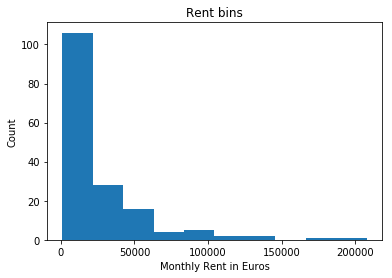

In [84]:
%matplotlib inline
plt.hist(rental_df["Rent per month"])

# set x/y labels and plot title
plt.xlabel("Monthly Rent in Euros")
plt.ylabel("Count")
plt.title("Rent bins")

<H2> Since most of the data i.e Rent per month falls below 20.000 Euros, let us apply a filter based on our choice (for example, 5.000 Euros)

In [85]:
final_rent_df = rental_df[rental_df['Rent per month'] < 5000]

In [87]:
final_rent_df.head()

,id,Latitude,Longitude,Rent per day,Rent per month,Rent per week,Neighbourhood
0,21466,52.373548,4.888542,30,900,210,Jordaan
1,9687,52.370135,4.890675,78,1428,540,Vierwindenstraat
2,9686,52.369711,4.889050,51,1428,357,Burgwallen-Oude Zijde
3,9657,52.373744,4.880662,50,1500,350,Oud-West
4,13805,52.378777,4.899093,60,1800,420,Bos en Lommer


<H2> Function to sort the venues in descending order

In [88]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

<H2> Creating a new dataframe and displaying the top 10 venues for each neighbourhood.

In [89]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighbourhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighbourhoods_venues_sorted = pd.DataFrame(columns=columns)
neighbourhoods_venues_sorted['Neighbourhood'] = amsterdam_grouped['Neighbourhood']

for ind in np.arange(amsterdam_grouped.shape[0]):
    neighbourhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(amsterdam_grouped.iloc[ind, :], num_top_venues)

neighbourhoods_venues_sorted.head()

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Amstel III/Bullewijk,Electronics Store,Restaurant,Furniture / Home Store,Fast Food Restaurant,Gym,Bistro,Rental Car Location,Fried Chicken Joint,Asian Restaurant,Intersection
1,Apollobuurt,Hotel,Italian Restaurant,Department Store,Juice Bar,Bridal Shop,Breakfast Spot,Café,French Restaurant,Bistro,Steakhouse
2,Banne Buiksloot,Park,Bus Stop,Supermarket,Turkish Restaurant,Shopping Mall,Business Service,Restaurant,Bakery,Empanada Restaurant,Ethiopian Restaurant
3,Bedrijventerrein Sloterdijk,Motorcycle Shop,Automotive Shop,Auto Workshop,Rental Car Location,Zoo Exhibit,Farmers Market,Ethiopian Restaurant,Event Space,Exhibit,Falafel Restaurant
4,Betondorp,Bakery,Sports Club,Market,Neighborhood,Fast Food Restaurant,Ethiopian Restaurant,Event Space,Exhibit,Falafel Restaurant,Farm


<H2> Adding count of venues to the grouped dataset containing the normalized data

In [90]:
ams_cluster_count_df = pd.merge(amsterdam_grouped, venue_count_df,how='inner', on=['Neighbourhood'])

In [91]:
ams_cluster_count_df.head()

,Neighbourhood,Accessories Store,Afghan Restaurant,African Restaurant,American Restaurant,Aquarium,Arcade,Argentinian Restaurant,Art Gallery,Art Museum,...,Video Game Store,Vietnamese Restaurant,Whisky Bar,Wine Bar,Wine Shop,Women's Store,Yoga Studio,Zoo,Zoo Exhibit,Venue Count
0,Amstel III/Bullewijk,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,14
1,Apollobuurt,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.045455,0.0,...,0.0,0.0,0.0,0.0,0.045455,0.0,0.0,0.0,0.0,22
2,Banne Buiksloot,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,11
3,Bedrijventerrein Sloterdijk,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,5
4,Betondorp,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,4


In [92]:
ams_gr_cluster = ams_cluster_count_df.drop('Neighbourhood', 1)
ams_gr_cluster.head()

,Accessories Store,Afghan Restaurant,African Restaurant,American Restaurant,Aquarium,Arcade,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,...,Video Game Store,Vietnamese Restaurant,Whisky Bar,Wine Bar,Wine Shop,Women's Store,Yoga Studio,Zoo,Zoo Exhibit,Venue Count
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,14
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.045455,0.0,0.0,...,0.0,0.0,0.0,0.0,0.045455,0.0,0.0,0.0,0.0,22
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,11
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,5
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,4


<H2> Determining the optimal value of K for K-means Clustering

In [93]:
inertias = [] 
mapping = {} 
K = range(1,10) 

for k in K: 
    #Building and fitting the model 
    kmeanModel = KMeans(n_clusters=k).fit(ams_gr_cluster) 
    kmeanModel.fit(ams_gr_cluster)

    inertias.append(kmeanModel.inertia_) 

    mapping[k] = kmeanModel.inertia_ 

<H2> Elbow method using Inertia

In [94]:
for key,val in mapping.items(): 
    print(str(key)+' : '+str(val)) 

1 : 87568.17667437717
2 : 20652.256719354235
3 : 6824.953470638945
4 : 3716.3699207184804
5 : 1945.0598811083905
6 : 1234.101343941547
7 : 950.3547074263762
8 : 694.4634958381621
9 : 530.8098285144328


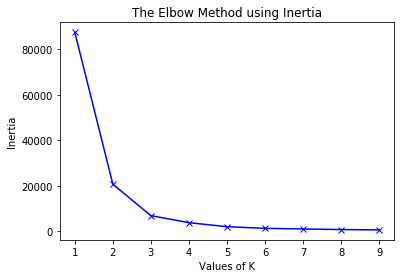

In [95]:
plt.plot(K, inertias, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Inertia') 
plt.title('The Elbow Method using Inertia') 
plt.show()

<H2> Avgerage Silhouette score

In [96]:
no_of_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10] 

for n_clusters in no_of_clusters: 

    new_cluster = KMeans(n_clusters = n_clusters) 
    new_cluster_labels = new_cluster.fit_predict(ams_gr_cluster) 

    # The silhouette_score gives the 
    # average value for all the samples. 
    silhouette_avg = silhouette_score(ams_gr_cluster, new_cluster_labels) 

    print("For no of clusters =", n_clusters, 
        " The average silhouette_score is :", silhouette_avg) 

For no of clusters = 2  The average silhouette_score is : 0.7025481180158615
For no of clusters = 3  The average silhouette_score is : 0.6728032173956577
For no of clusters = 4  The average silhouette_score is : 0.6474298643251531
For no of clusters = 5  The average silhouette_score is : 0.6364485687678435
For no of clusters = 6  The average silhouette_score is : 0.6398413604222877
For no of clusters = 7  The average silhouette_score is : 0.6414032275854279
For no of clusters = 8  The average silhouette_score is : 0.6152564252487067
For no of clusters = 9  The average silhouette_score is : 0.5962534210093026
For no of clusters = 10  The average silhouette_score is : 0.6235268630975621


<H2> K-Means Clustering

In [97]:
# set number of clusters
kclusters = 2

amsterdam_grouped_clustering = ams_cluster_count_df.drop('Neighbourhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(amsterdam_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_ 

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 1])

In [98]:
neighbourhoods_venues_sorted.head()

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Amstel III/Bullewijk,Electronics Store,Restaurant,Furniture / Home Store,Fast Food Restaurant,Gym,Bistro,Rental Car Location,Fried Chicken Joint,Asian Restaurant,Intersection
1,Apollobuurt,Hotel,Italian Restaurant,Department Store,Juice Bar,Bridal Shop,Breakfast Spot,Café,French Restaurant,Bistro,Steakhouse
2,Banne Buiksloot,Park,Bus Stop,Supermarket,Turkish Restaurant,Shopping Mall,Business Service,Restaurant,Bakery,Empanada Restaurant,Ethiopian Restaurant
3,Bedrijventerrein Sloterdijk,Motorcycle Shop,Automotive Shop,Auto Workshop,Rental Car Location,Zoo Exhibit,Farmers Market,Ethiopian Restaurant,Event Space,Exhibit,Falafel Restaurant
4,Betondorp,Bakery,Sports Club,Market,Neighborhood,Fast Food Restaurant,Ethiopian Restaurant,Event Space,Exhibit,Falafel Restaurant,Farm


In [99]:
amsterdam_grouped.head()

,Neighbourhood,Accessories Store,Afghan Restaurant,African Restaurant,American Restaurant,Aquarium,Arcade,Argentinian Restaurant,Art Gallery,Art Museum,...,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Whisky Bar,Wine Bar,Wine Shop,Women's Store,Yoga Studio,Zoo,Zoo Exhibit
0,Amstel III/Bullewijk,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1,Apollobuurt,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.045455,0.0,...,0.0,0.0,0.0,0.0,0.0,0.045455,0.0,0.0,0.0,0.0
2,Banne Buiksloot,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
3,Bedrijventerrein Sloterdijk,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
4,Betondorp,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


In [100]:
ams_df.head()

,Neighbourhood,City,Region code,Number of inhabitants,Longitude,Latitude
0,Burgwallen-Oude Zijde,Amsterdam,WK036300,4280,4.896943,52.372566
1,Burgwallen-Nieuwe Zijde,Amsterdam,WK036301,3960,4.895518,52.375703
2,Grachtengordel-West,Amsterdam,WK036302,6475,4.886836,52.373709
3,Grachtengordel-Zuid,Amsterdam,WK036303,5440,4.893349,52.364821
4,Nieuwmarkt/Lastage,Amsterdam,WK036304,9605,4.905641,52.372436


In [101]:
# add clustering labels
neighbourhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

amsterdam_merged = ams_df

# merge to add latitude/longitude for each neighborhood
amsterdam_merged = amsterdam_merged.join(neighbourhoods_venues_sorted.set_index('Neighbourhood'), on='Neighbourhood')

amsterdam_merged.head() # check the last columns!

,Neighbourhood,City,Region code,Number of inhabitants,Longitude,Latitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Burgwallen-Oude Zijde,Amsterdam,WK036300,4280,4.896943,52.372566,0.0,Bar,Hotel,Coffee Shop,Museum,Marijuana Dispensary,Chinese Restaurant,Bakery,Café,Brewery,Clothing Store
1,Burgwallen-Nieuwe Zijde,Amsterdam,WK036301,3960,4.895518,52.375703,0.0,Bar,Coffee Shop,Italian Restaurant,Dessert Shop,Bakery,Cheese Shop,Pub,Hotel,Burger Joint,Marijuana Dispensary
2,Grachtengordel-West,Amsterdam,WK036302,6475,4.886836,52.373709,0.0,Bar,Hotel,Café,French Restaurant,Marijuana Dispensary,Coffee Shop,Cocktail Bar,Steakhouse,Creperie,Beer Bar
3,Grachtengordel-Zuid,Amsterdam,WK036303,5440,4.893349,52.364821,0.0,Italian Restaurant,Marijuana Dispensary,Hotel,Movie Theater,Coffee Shop,Burger Joint,Restaurant,Cocktail Bar,Café,Steakhouse
4,Nieuwmarkt/Lastage,Amsterdam,WK036304,9605,4.905641,52.372436,0.0,Bar,Hotel,Coffee Shop,Italian Restaurant,Chinese Restaurant,Marijuana Dispensary,Hostel,Thai Restaurant,Deli / Bodega,Café


In [102]:
amsterdam_merged.dropna(inplace=True)

In [103]:
amsterdam_merged = amsterdam_merged.astype({'Cluster Labels': 'int'})

In [105]:
amsterdam_merged.head()

,Neighbourhood,City,Region code,Number of inhabitants,Longitude,Latitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Burgwallen-Oude Zijde,Amsterdam,WK036300,4280,4.896943,52.372566,0,Bar,Hotel,Coffee Shop,Museum,Marijuana Dispensary,Chinese Restaurant,Bakery,Café,Brewery,Clothing Store
1,Burgwallen-Nieuwe Zijde,Amsterdam,WK036301,3960,4.895518,52.375703,0,Bar,Coffee Shop,Italian Restaurant,Dessert Shop,Bakery,Cheese Shop,Pub,Hotel,Burger Joint,Marijuana Dispensary
2,Grachtengordel-West,Amsterdam,WK036302,6475,4.886836,52.373709,0,Bar,Hotel,Café,French Restaurant,Marijuana Dispensary,Coffee Shop,Cocktail Bar,Steakhouse,Creperie,Beer Bar
3,Grachtengordel-Zuid,Amsterdam,WK036303,5440,4.893349,52.364821,0,Italian Restaurant,Marijuana Dispensary,Hotel,Movie Theater,Coffee Shop,Burger Joint,Restaurant,Cocktail Bar,Café,Steakhouse
4,Nieuwmarkt/Lastage,Amsterdam,WK036304,9605,4.905641,52.372436,0,Bar,Hotel,Coffee Shop,Italian Restaurant,Chinese Restaurant,Marijuana Dispensary,Hostel,Thai Restaurant,Deli / Bodega,Café


In [106]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(amsterdam_merged['Latitude'], amsterdam_merged['Longitude'], amsterdam_merged['Neighbourhood'], amsterdam_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

<H2> Choosing our Cluster for further analysis

In [107]:
choice_df = amsterdam_merged[amsterdam_merged['Cluster Labels'] == 0]

In [108]:
choice_df = choice_df.reset_index(drop=True)

In [109]:
choice_df

,Neighbourhood,City,Region code,Number of inhabitants,Longitude,Latitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Burgwallen-Oude Zijde,Amsterdam,WK036300,4280,4.896943,52.372566,0,Bar,Hotel,Coffee Shop,Museum,Marijuana Dispensary,Chinese Restaurant,Bakery,Café,Brewery,Clothing Store
1,Burgwallen-Nieuwe Zijde,Amsterdam,WK036301,3960,4.895518,52.375703,0,Bar,Coffee Shop,Italian Restaurant,Dessert Shop,Bakery,Cheese Shop,Pub,Hotel,Burger Joint,Marijuana Dispensary
2,Grachtengordel-West,Amsterdam,WK036302,6475,4.886836,52.373709,0,Bar,Hotel,Café,French Restaurant,Marijuana Dispensary,Coffee Shop,Cocktail Bar,Steakhouse,Creperie,Beer Bar
3,Grachtengordel-Zuid,Amsterdam,WK036303,5440,4.893349,52.364821,0,Italian Restaurant,Marijuana Dispensary,Hotel,Movie Theater,Coffee Shop,Burger Joint,Restaurant,Cocktail Bar,Café,Steakhouse
4,Nieuwmarkt/Lastage,Amsterdam,WK036304,9605,4.905641,52.372436,0,Bar,Hotel,Coffee Shop,Italian Restaurant,Chinese Restaurant,Marijuana Dispensary,Hostel,Thai Restaurant,Deli / Bodega,Café
5,Jordaan,Amsterdam,WK036306,19390,4.880786,52.374805,0,Bar,Café,Hotel,Coffee Shop,Yoga Studio,Pizza Place,Marijuana Dispensary,Furniture / Home Store,Italian Restaurant,Indian Restaurant
6,De Weteringschans,Amsterdam,WK036307,7340,4.892427,52.361170,0,Bar,Coffee Shop,Café,Italian Restaurant,French Restaurant,Hotel,Art Museum,Japanese Restaurant,Steakhouse,Supermarket
7,Weesperbuurt/Plantage,Amsterdam,WK036308,7930,4.911103,52.364499,0,Zoo Exhibit,Hotel,Bar,Restaurant,Café,Museum,Sandwich Place,Bakery,Coffee Shop,Pizza Place
8,Da Costabuurt,Amsterdam,WK036317,4680,4.872120,52.370131,0,Bar,Coffee Shop,Italian Restaurant,Yoga Studio,Dutch Restaurant,Burger Joint,Pizza Place,Hotel,Vegetarian / Vegan Restaurant,Marijuana Dispensary
9,Kinkerbuurt,Amsterdam,WK036318,6345,4.865804,52.367714,0,Bar,Café,Restaurant,Coffee Shop,Italian Restaurant,Indonesian Restaurant,Yoga Studio,Vegetarian / Vegan Restaurant,Pizza Place,Dance Studio


In [110]:
tot_count_df.head()

,Neighbourhood,Venue Count,Italian Restaurant count
0,Grachtengordel-West,100,2
1,Grachtengordel-Zuid,100,7
2,Jordaan,100,2
3,Da Costabuurt,100,5
4,Museumkwartier,100,2


<H2> Merging the dataframe containing our chosen cluster Neighbourhoods with 'Venue Count' & 'Italian Restaurant count'

In [111]:
fin_choice_df = pd.merge(choice_df, tot_count_df,how='inner', on=['Neighbourhood'])

In [112]:
fin_choice_df.head()

,Neighbourhood,City,Region code,Number of inhabitants,Longitude,Latitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Venue Count,Italian Restaurant count
0,Burgwallen-Oude Zijde,Amsterdam,WK036300,4280,4.896943,52.372566,0,Bar,Hotel,Coffee Shop,Museum,Marijuana Dispensary,Chinese Restaurant,Bakery,Café,Brewery,Clothing Store,100,1
1,Burgwallen-Nieuwe Zijde,Amsterdam,WK036301,3960,4.895518,52.375703,0,Bar,Coffee Shop,Italian Restaurant,Dessert Shop,Bakery,Cheese Shop,Pub,Hotel,Burger Joint,Marijuana Dispensary,100,4
2,Grachtengordel-West,Amsterdam,WK036302,6475,4.886836,52.373709,0,Bar,Hotel,Café,French Restaurant,Marijuana Dispensary,Coffee Shop,Cocktail Bar,Steakhouse,Creperie,Beer Bar,100,2
3,Grachtengordel-Zuid,Amsterdam,WK036303,5440,4.893349,52.364821,0,Italian Restaurant,Marijuana Dispensary,Hotel,Movie Theater,Coffee Shop,Burger Joint,Restaurant,Cocktail Bar,Café,Steakhouse,100,7
4,Nieuwmarkt/Lastage,Amsterdam,WK036304,9605,4.905641,52.372436,0,Bar,Hotel,Coffee Shop,Italian Restaurant,Chinese Restaurant,Marijuana Dispensary,Hostel,Thai Restaurant,Deli / Bodega,Café,90,4


In [113]:
fin_choice_df = fin_choice_df[['Neighbourhood', 'Venue Count', 'Italian Restaurant count', 'Longitude', 'Latitude', '1st Most Common Venue', '2nd Most Common Venue', '3rd Most Common Venue', '4th Most Common Venue', '5th Most Common Venue']]

In [114]:
fin_choice_df

,Neighbourhood,Venue Count,Italian Restaurant count,Longitude,Latitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Burgwallen-Oude Zijde,100,1,4.896943,52.372566,Bar,Hotel,Coffee Shop,Museum,Marijuana Dispensary
1,Burgwallen-Nieuwe Zijde,100,4,4.895518,52.375703,Bar,Coffee Shop,Italian Restaurant,Dessert Shop,Bakery
2,Grachtengordel-West,100,2,4.886836,52.373709,Bar,Hotel,Café,French Restaurant,Marijuana Dispensary
3,Grachtengordel-Zuid,100,7,4.893349,52.364821,Italian Restaurant,Marijuana Dispensary,Hotel,Movie Theater,Coffee Shop
4,Nieuwmarkt/Lastage,90,4,4.905641,52.372436,Bar,Hotel,Coffee Shop,Italian Restaurant,Chinese Restaurant
5,Jordaan,100,2,4.880786,52.374805,Bar,Café,Hotel,Coffee Shop,Yoga Studio
6,De Weteringschans,100,4,4.892427,52.361170,Bar,Coffee Shop,Café,Italian Restaurant,French Restaurant
7,Weesperbuurt/Plantage,66,1,4.911103,52.364499,Zoo Exhibit,Hotel,Bar,Restaurant,Café
8,Da Costabuurt,100,5,4.872120,52.370131,Bar,Coffee Shop,Italian Restaurant,Yoga Studio,Dutch Restaurant
9,Kinkerbuurt,100,4,4.865804,52.367714,Bar,Café,Restaurant,Coffee Shop,Italian Restaurant


<H2> Filtering Italian restaurants in our chosen cluster of Neighbourhoods

In [115]:
italian_comp_df = italian_r[italian_r['Neighbourhood'].isin(fin_choice_df['Neighbourhood'])]

In [116]:
italian_comp_df.head()

,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
87,Burgwallen-Oude Zijde,52.372566,4.896943,La Zoccola del Pacioccone,52.375297,4.893965,Italian Restaurant
107,Burgwallen-Nieuwe Zijde,52.375703,4.895518,La Zoccola del Pacioccone,52.375297,4.893965,Italian Restaurant
181,Burgwallen-Nieuwe Zijde,52.375703,4.895518,Pastabar,52.376518,4.897432,Italian Restaurant
187,Burgwallen-Nieuwe Zijde,52.375703,4.895518,Ava Cyrill İtaliaans Restaurant,52.377954,4.895812,Italian Restaurant
190,Burgwallen-Nieuwe Zijde,52.375703,4.895518,Il Pacioccone,52.376499,4.895622,Italian Restaurant


In [117]:
final_rent_df.head()

,id,Latitude,Longitude,Rent per day,Rent per month,Rent per week,Neighbourhood
0,21466,52.373548,4.888542,30,900,210,Jordaan
1,9687,52.370135,4.890675,78,1428,540,Vierwindenstraat
2,9686,52.369711,4.889050,51,1428,357,Burgwallen-Oude Zijde
3,9657,52.373744,4.880662,50,1500,350,Oud-West
4,13805,52.378777,4.899093,60,1800,420,Bos en Lommer


<H2> Overlapping the map with our chosen cluster of Neighbourhoods, the competition and the rental properties available to choose the best Neighbourhood

In [118]:
# create map
map_choice = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to the map
for lat, lng, label in zip(fin_choice_df['Latitude'], fin_choice_df['Longitude'], fin_choice_df['Neighbourhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_choice)  
    
# add markers to the map
for lat, lng, label in zip(italian_comp_df['Venue Latitude'], italian_comp_df['Venue Longitude'], italian_comp_df['Venue']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='#cc3131',
        fill_opacity=0.7,
        parse_html=False).add_to(map_choice)  

# add markers to the map
for lat, lng, label in zip(final_rent_df['Latitude'], final_rent_df['Longitude'], final_rent_df['Rent per month']):
    label = folium.Popup(str(label), parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='green',
        fill=True,
        fill_color='#44e82e',
        fill_opacity=0.7,
        parse_html=False).add_to(map_choice)    
    
map_choice